In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv("Cars Datasets 2025.csv", encoding="latin1")
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,"$1,100,000",plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,"$460,000",Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,"1,200 cc",70-85 hp,165 km/h,10.5 sec,"$12,000-$15,000",Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,"3,982 cc",630 hp,250 km/h,3.2 sec,"$161,000",Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,"5,204 cc",602 hp,320 km/h,3.6 sec,"$253,290",Petrol,2,560 Nm


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1210 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1210 non-null   object
 1   Cars Names                 1210 non-null   object
 2   Engines                    1210 non-null   object
 3   CC/Battery Capacity        1210 non-null   object
 4   HorsePower                 1210 non-null   object
 5   Total Speed                1210 non-null   object
 6   Performance(0 - 100 )KM/H  1210 non-null   object
 7   Cars Prices                1210 non-null   object
 8   Fuel Types                 1210 non-null   object
 9   Seats                      1210 non-null   object
 10  Torque                     1210 non-null   object
dtypes: object(11)
memory usage: 113.4+ KB


MISSING VALUE TREATMENT

In [9]:
df.isnull()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1213,False,False,False,False,False,False,False,False,False,False,False
1214,False,False,False,False,False,False,False,False,False,False,False
1215,False,False,False,False,False,False,False,False,False,False,False
1216,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          3
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    6
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       1
dtype: int64

In [11]:
df.shape

(1218, 11)

In [16]:
df.isnull().sum()/df.shape[0]*100

Company Names                0.0
Cars Names                   0.0
Engines                      0.0
CC/Battery Capacity          0.0
HorsePower                   0.0
Total Speed                  0.0
Performance(0 - 100 )KM/H    0.0
Cars Prices                  0.0
Fuel Types                   0.0
Seats                        0.0
Torque                       0.0
dtype: float64

In [15]:
df.dropna(inplace=True)

If we dont want to drop the missing values we can use df.fillna(...use mean/median for cont num and mode for categorical and discrete num)

In [19]:
df['Company Names'][0]

'FERRARI'

we can make new columns by doing df['new column name']=whatever value you want to assign

STANDARDIZED FORMATTING

In [20]:
df['Cars Prices']

0             $1,100,000 
1               $460,000 
2         $12,000-$15,000
3               $161,000 
4               $253,290 
              ...        
1213    $43,590  $48,000
1214             $50,000 
1215    $25,210  $29,135
1216              33,000
1217    $29,000  $43,000
Name: Cars Prices, Length: 1210, dtype: object

we need to remove ("," , "currency names")

In [21]:
df['Cars Prices'].str.replace(',',"")

0             $1100000 
1              $460000 
2         $12000-$15000
3              $161000 
4              $253290 
             ...       
1213    $43590  $48000
1214            $50000 
1215    $25210  $29135
1216             33000
1217    $29000  $43000
Name: Cars Prices, Length: 1210, dtype: object

In [22]:
df.tail()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
1213,Toyota,Crown Signia,2.5L Hybrid I4,2487 cc,240 hp,180 km/h,7.6 sec,"$43,590  $48,000",Hybrid (Gas + Electric),5,239 Nm
1214,Toyota,4Runner (6th Gen),2.4L Turbo I4 (i-FORCE MAX Hybrid),2393 cc + Battery,326 hp,180 km/h,6.8 sec,"$50,000",Hybrid,7,630 Nm
1215,Toyota,Corolla Cross,2.0L Gas / 2.0L Hybrid,1987 cc / Hybrid batt,169  196 hp,190 km/h,8.0  9.2 sec,"$25,210  $29,135",Gas / Hybrid,5,190  210 Nm
1216,Toyota,C-HR+,1.8L / 2.0L Hybrid,1798 / 1987 cc + batt,140  198 hp,180 km/h,7.9  10.5 sec," 33,000",Hybrid,5,190  205 Nm
1217,Toyota,RAV4 (6th Gen),2.5L Hybrid / Plug-in Hybrid,2487 cc + batt,219  302 hp,200 km/h,6.0  8.1 sec,"$29,000  $43,000",Hybrid / Plug-in,5,221  400 Nm


Lets remove currency and commas

In [24]:
df['Cars Prices']=df['Cars Prices'].str.replace('$',"").str.replace(",","")

lets normalize these too many range symbols to a single "-"

In [25]:
df['Cars Prices']

0            1100000 
1             460000 
2         12000-15000
3             161000 
4             253290 
            ...      
1213    43590  48000
1214           50000 
1215    25210  29135
1216           33000
1217    29000  43000
Name: Cars Prices, Length: 1210, dtype: object

In [26]:
df['Cars Prices']=df['Cars Prices'].str.replace("–","-")
df['Cars Prices']=df['Cars Prices'].str.replace("—", "-") 
df['Cars Prices']=df['Cars Prices'].str.replace("", "-")

In [28]:
df['Cars Prices'].head()

0       1100000 
1        460000 
2    12000-15000
3        161000 
4        253290 
Name: Cars Prices, dtype: object

In [29]:
df['Cars Prices'].tail()

1213    43590 - 48000
1214           50000 
1215    25210 - 29135
1216           33000
1217    29000 - 43000
Name: Cars Prices, dtype: object

In [30]:
import re

In [31]:
df["Cars Prices"] = df["Cars Prices"].apply(lambda x: re.sub(r"[^0-9\- ]", "", x))


In [32]:
df['Cars Prices'].tail()

1213    43590 - 48000
1214           50000 
1215    25210 - 29135
1216            33000
1217    29000 - 43000
Name: Cars Prices, dtype: object

In [34]:
df["Cars Prices"] = df["Cars Prices"].str.replace(r"\s+", "-", regex=True)


Writing a function to find midpoint for price ranges

In [36]:
import re

# Step 1: Clean the column
df["Cars Prices"] = df["Cars Prices"].apply(lambda x: re.sub(r"[^0-9\- ]", "", str(x)))
df["Cars Prices"] = df["Cars Prices"].str.replace(r"\s+", "-", regex=True)

# Step 2: Safe function
def process_price(value):
    value = value.strip("-").strip()   # remove stray dashes
    if "-" in value:
        parts = [p for p in value.split("-") if p.strip()]  # remove empty pieces
        if len(parts) == 2:  # exactly two numbers
            low, high = parts
            return (int(low) + int(high)) / 2
        elif len(parts) == 1:  # only one number left
            return int(parts[0])
        else:
            return None  # something weird, skip or handle separately
    elif value.isdigit():
        return int(value)
    else:
        return None  # if it's empty or not a number

# Step 3: Apply
df["Cars Prices"] = df["Cars Prices"].apply(process_price)


In [38]:
df['Cars Prices']

0       1100000.0
1        460000.0
2         13500.0
3        161000.0
4        253290.0
          ...    
1213      45795.0
1214      50000.0
1215      27172.5
1216      33000.0
1217      36000.0
Name: Cars Prices, Length: 1210, dtype: float64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1210 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company Names              1210 non-null   object 
 1   Cars Names                 1210 non-null   object 
 2   Engines                    1210 non-null   object 
 3   CC/Battery Capacity        1210 non-null   object 
 4   HorsePower                 1210 non-null   object 
 5   Total Speed                1210 non-null   object 
 6   Performance(0 - 100 )KM/H  1210 non-null   object 
 7   Cars Prices                1210 non-null   float64
 8   Fuel Types                 1210 non-null   object 
 9   Seats                      1210 non-null   object 
 10  Torque                     1210 non-null   object 
dtypes: float64(1), object(10)
memory usage: 145.7+ KB


In [40]:
df.columns

Index(['Company Names', 'Cars Names', 'Engines', 'CC/Battery Capacity',
       'HorsePower', 'Total Speed', 'Performance(0 - 100 )KM/H', 'Cars Prices',
       'Fuel Types', 'Seats', 'Torque'],
      dtype='object')

In [49]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963 hp,340 km/h,2.5 sec,1100000.0,plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563 hp,250 km/h,5.3 sec,460000.0,Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,1200 cc,70-85 hp,165 km/h,10.5 sec,13500.0,Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,3982 cc,630 hp,250 km/h,3.2 sec,161000.0,Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,5204 cc,602 hp,320 km/h,3.6 sec,253290.0,Petrol,2,560 Nm


In [47]:
df['CC/Battery Capacity']=df['CC/Battery Capacity'].str.replace(',',"")

In [48]:
df['CC/Battery Capacity']

0                     3990 cc
1                     6749 cc
2                     1200 cc
3                     3982 cc
4                     5204 cc
                ...          
1213                  2487 cc
1214        2393 cc + Battery
1215    1987 cc / Hybrid batt
1216    1798 / 1987 cc + batt
1217           2487 cc + batt
Name: CC/Battery Capacity, Length: 1210, dtype: object

In [52]:
df['HorsePower']

0             963 hp
1             563 hp
2           70-85 hp
3             630 hp
4             602 hp
            ...     
1213          240 hp
1214          326 hp
1215    169  196 hp
1216    140  198 hp
1217    219  302 hp
Name: HorsePower, Length: 1210, dtype: object

In [57]:
df['HorsePower']=df['HorsePower'].str.replace('hp','')

In [60]:
df['HorsePower']=df['HorsePower'].str.replace("–","-")
df['HorsePower']=df['HorsePower'].str.replace("—", "-") 
df['HorsePower']=df['HorsePower'].str.replace("", "-")
df['HorsePower']=df['HorsePower'].str.replace("~", "-")


In [61]:
df['HorsePower']

0             963 
1             563 
2           70-85 
3             630 
4             602 
           ...    
1213          240 
1214          326 
1215    169 - 196 
1216    140 - 198 
1217    219 - 302 
Name: HorsePower, Length: 1210, dtype: object

In [63]:
def horse_power(value):
    value = str(value).strip()   # make sure it's a string
    
    if "-" in value:  # range case
        parts = [p.strip() for p in value.split("-") if p.strip()]  # keep only non-empty numbers
        
        if len(parts) == 2:  # valid range
            low, high = parts
            return (int(low) + int(high)) / 2
        elif len(parts) == 1:  # only one number present
            return int(parts[0])
        else:
            return None  # something weird
    else:  # single value
        if value.strip().isdigit():
            return int(value.strip())
        else:
            return None  # empty or invalid
df["HorsePower"] = df["HorsePower"].apply(horse_power)


In [64]:
df['HorsePower']

0       963.0
1       563.0
2        77.5
3       630.0
4       602.0
        ...  
1213    240.0
1214    326.0
1215    182.5
1216    169.0
1217    260.5
Name: HorsePower, Length: 1210, dtype: float64

In [65]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963.0,340 km/h,2.5 sec,1100000.0,plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563.0,250 km/h,5.3 sec,460000.0,Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,1200 cc,77.5,165 km/h,10.5 sec,13500.0,Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,3982 cc,630.0,250 km/h,3.2 sec,161000.0,Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,5204 cc,602.0,320 km/h,3.6 sec,253290.0,Petrol,2,560 Nm


Formatting total speed

In [66]:
df['Total Speed']

0       340 km/h
1       250 km/h
2       165 km/h
3       250 km/h
4       320 km/h
          ...   
1213    180 km/h
1214    180 km/h
1215    190 km/h
1216    180 km/h
1217    200 km/h
Name: Total Speed, Length: 1210, dtype: object

In [ ]:
df['Total Speed']=df['Total Speed'].str.replace('km/h','')


In [68]:
df['Total Speed']

0       340 
1       250 
2       165 
3       250 
4       320 
        ... 
1213    180 
1214    180 
1215    190 
1216    180 
1217    200 
Name: Total Speed, Length: 1210, dtype: object

In [69]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963.0,340,2.5 sec,1100000.0,plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563.0,250,5.3 sec,460000.0,Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,1200 cc,77.5,165,10.5 sec,13500.0,Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,3982 cc,630.0,250,3.2 sec,161000.0,Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,5204 cc,602.0,320,3.6 sec,253290.0,Petrol,2,560 Nm


In [70]:
df['Performance(0 - 100 )KM/H']

0              2.5 sec
1              5.3 sec
2             10.5 sec
3              3.2 sec
4              3.6 sec
             ...      
1213           7.6 sec
1214           6.8 sec
1215     8.0  9.2 sec
1216    7.9  10.5 sec
1217     6.0  8.1 sec
Name: Performance(0 - 100 )KM/H, Length: 1210, dtype: object

In [71]:
df['Performance(0 - 100 )KM/H']=df['Performance(0 - 100 )KM/H'].str.replace('sec','')

In [80]:
df['Performance(0 - 100 )KM/H']

0       None
1       None
2       None
3       None
4       None
        ... 
1213    None
1214    None
1215    None
1216    None
1217    None
Name: Performance(0 - 100 )KM/H, Length: 1210, dtype: object

In [73]:
df['Performance(0 - 100 )KM/H']=df['Performance(0 - 100 )KM/H'].str.replace("–","-")
df['Performance(0 - 100 )KM/H']=df['Performance(0 - 100 )KM/H'].str.replace("—", "-") 
df['Performance(0 - 100 )KM/H']=df['Performance(0 - 100 )KM/H'].str.replace("", "-")
df['Performance(0 - 100 )KM/H']=df['Performance(0 - 100 )KM/H'].str.replace("~", "-")

In [79]:
def performance(value):
    value = str(value).strip()   # make sure it's a string
    
    if "-" in value:  # range case
        parts = [p.strip() for p in value.split("-") if p.strip()]  # keep only non-empty numbers
        
        if len(parts) == 2:  # valid range
            low, high = parts
            return (int(low) + int(high)) / 2
        elif len(parts) == 1:  # only one number present
            return int(parts[0])
        else:
            return None  # something weird
    else:  # single value
        if value.strip().isdigit():
            return int(value.strip())
        else:
            return None  # empty or invalid
df['Performance(0 - 100 )KM/H'] = df['Performance(0 - 100 )KM/H'].apply(performance)

In [81]:
df = df.drop(columns=['Performance(0 - 100 )KM/H'])


In [82]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963.0,340,1100000.0,plug in hyrbrid,2,800 Nm
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563.0,250,460000.0,Petrol,5,900 Nm
2,Ford,KA+,1.2L Petrol,1200 cc,77.5,165,13500.0,Petrol,5,100 - 140 Nm
3,MERCEDES,GT 63 S,V8,3982 cc,630.0,250,161000.0,Petrol,4,900 Nm
4,AUDI,AUDI R8 Gt,V10,5204 cc,602.0,320,253290.0,Petrol,2,560 Nm


In [83]:
df['Torque']

0             800 Nm
1             900 Nm
2       100 - 140 Nm
3             900 Nm
4             560 Nm
            ...     
1213          239 Nm
1214          630 Nm
1215    190  210 Nm
1216    190  205 Nm
1217    221  400 Nm
Name: Torque, Length: 1210, dtype: object

In [89]:
df['Torque']=df['Torque'].str.replace('Nm','')

In [85]:
df['Torque']=df['Torque'].str.replace("–","-")
df['Torque']=df['Torque'].str.replace("—", "-") 
df['Torque']=df['Torque'].str.replace("", "-")
df['Torque']=df['Torque'].str.replace("~", "-")

In [90]:
df['Torque'].head()

0          800 
1          900 
2    100 - 140 
3          900 
4          560 
Name: Torque, dtype: object

In [91]:
df['Torque'].tail()

1213          239 
1214          630 
1215    190 - 210 
1216    190 - 205 
1217    221 - 400 
Name: Torque, dtype: object

In [92]:
import re

def process_torque(value):
    # Remove all non-numeric and non-dash characters (e.g., "Nm")
    cleaned = re.sub(r"[^0-9\- ]", "", str(value)).strip()
    
    # If it's a range
    if "-" in cleaned:
        parts = [p.strip() for p in cleaned.split("-") if p.strip()]
        if len(parts) == 2:  # valid range
            low, high = parts
            return (int(low) + int(high)) / 2
        elif len(parts) == 1:  # fallback if only one number
            return int(parts[0])
        else:
            return None
    else:  # single value
        return int(cleaned) if cleaned.isdigit() else None

# Apply function to your column
df["Torque"] = df["Torque"].apply(process_torque)


In [93]:
df['Torque']

0       800.0
1       900.0
2       120.0
3       900.0
4       560.0
        ...  
1213    239.0
1214    630.0
1215    200.0
1216    197.5
1217    310.5
Name: Torque, Length: 1210, dtype: float64

In [94]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990 cc,963.0,340,1100000.0,plug in hyrbrid,2,800.0
1,ROLLS ROYCE,PHANTOM,V12,6749 cc,563.0,250,460000.0,Petrol,5,900.0
2,Ford,KA+,1.2L Petrol,1200 cc,77.5,165,13500.0,Petrol,5,120.0
3,MERCEDES,GT 63 S,V8,3982 cc,630.0,250,161000.0,Petrol,4,900.0
4,AUDI,AUDI R8 Gt,V10,5204 cc,602.0,320,253290.0,Petrol,2,560.0


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1210 entries, 0 to 1217
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company Names        1210 non-null   object 
 1   Cars Names           1210 non-null   object 
 2   Engines              1210 non-null   object 
 3   CC/Battery Capacity  1210 non-null   object 
 4   HorsePower           1027 non-null   float64
 5   Total Speed          1210 non-null   object 
 6   Cars Prices          1210 non-null   float64
 7   Fuel Types           1210 non-null   object 
 8   Seats                1210 non-null   object 
 9   Torque               1206 non-null   float64
dtypes: float64(3), object(7)
memory usage: 136.3+ KB


In [96]:
df['CC/Battery Capacity']=df['CC/Battery Capacity'].str.replace('cc','')

In [97]:
df['CC/Battery Capacity']

0                     3990 
1                     6749 
2                     1200 
3                     3982 
4                     5204 
               ...         
1213                  2487 
1214        2393  + Battery
1215    1987  / Hybrid batt
1216    1798 / 1987  + batt
1217           2487  + batt
Name: CC/Battery Capacity, Length: 1210, dtype: object

In [98]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,SF90 STRADALE,V8,3990,963.0,340,1100000.0,plug in hyrbrid,2,800.0
1,ROLLS ROYCE,PHANTOM,V12,6749,563.0,250,460000.0,Petrol,5,900.0
2,Ford,KA+,1.2L Petrol,1200,77.5,165,13500.0,Petrol,5,120.0
3,MERCEDES,GT 63 S,V8,3982,630.0,250,161000.0,Petrol,4,900.0
4,AUDI,AUDI R8 Gt,V10,5204,602.0,320,253290.0,Petrol,2,560.0


In [99]:
df['Speed Unit']='km/h'

In [100]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Cars Prices,Fuel Types,Seats,Torque,Speed Unit
0,FERRARI,SF90 STRADALE,V8,3990,963.0,340,1100000.0,plug in hyrbrid,2,800.0,km/h
1,ROLLS ROYCE,PHANTOM,V12,6749,563.0,250,460000.0,Petrol,5,900.0,km/h
2,Ford,KA+,1.2L Petrol,1200,77.5,165,13500.0,Petrol,5,120.0,km/h
3,MERCEDES,GT 63 S,V8,3982,630.0,250,161000.0,Petrol,4,900.0,km/h
4,AUDI,AUDI R8 Gt,V10,5204,602.0,320,253290.0,Petrol,2,560.0,km/h


Encoding Categorical Variables For ML

In [102]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [104]:
df['Cars Names']=LabelEncoder().fit_transform(df['Cars Names'])

In [105]:
df['Cars Names']

0       882
1       735
2       606
3         0
4       139
       ... 
1213    347
1214     67
1215    339
1216    240
1217    837
Name: Cars Names, Length: 1210, dtype: int64

In [106]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Cars Prices,Fuel Types,Seats,Torque,Speed Unit
0,FERRARI,882,V8,3990,963.0,340,1100000.0,plug in hyrbrid,2,800.0,km/h
1,ROLLS ROYCE,735,V12,6749,563.0,250,460000.0,Petrol,5,900.0,km/h
2,Ford,606,1.2L Petrol,1200,77.5,165,13500.0,Petrol,5,120.0,km/h
3,MERCEDES,0,V8,3982,630.0,250,161000.0,Petrol,4,900.0,km/h
4,AUDI,139,V10,5204,602.0,320,253290.0,Petrol,2,560.0,km/h


In [109]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
df['Fuel Types']=LabelEncoder().fit_transform(df['Fuel Types'])

In [110]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Cars Prices,Fuel Types,Seats,Torque,Speed Unit
0,FERRARI,882,V8,3990,963.0,340,1100000.0,20,2,800.0,km/h
1,ROLLS ROYCE,735,V12,6749,563.0,250,460000.0,12,5,900.0,km/h
2,Ford,606,1.2L Petrol,1200,77.5,165,13500.0,12,5,120.0,km/h
3,MERCEDES,0,V8,3982,630.0,250,161000.0,12,4,900.0,km/h
4,AUDI,139,V10,5204,602.0,320,253290.0,12,2,560.0,km/h


In [111]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

df['Engines']=LabelEncoder().fit_transform(df['Engines'])

In [112]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Cars Prices,Fuel Types,Seats,Torque,Speed Unit
0,FERRARI,882,347,3990,963.0,340,1100000.0,20,2,800.0,km/h
1,ROLLS ROYCE,735,339,6749,563.0,250,460000.0,12,5,900.0,km/h
2,Ford,606,26,1200,77.5,165,13500.0,12,5,120.0,km/h
3,MERCEDES,0,347,3982,630.0,250,161000.0,12,4,900.0,km/h
4,AUDI,139,338,5204,602.0,320,253290.0,12,2,560.0,km/h


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1210 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company Names        1210 non-null   object 
 1   Cars Names           1210 non-null   int64  
 2   Engines              1210 non-null   int64  
 3   CC/Battery Capacity  1210 non-null   object 
 4   HorsePower           1027 non-null   float64
 5   Total Speed          1210 non-null   object 
 6   Cars Prices          1210 non-null   float64
 7   Fuel Types           1210 non-null   int64  
 8   Seats                1210 non-null   object 
 9   Torque               1206 non-null   float64
 10  Speed Unit           1210 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 145.7+ KB


In [114]:
df['Total Speed']

0       340 
1       250 
2       165 
3       250 
4       320 
        ... 
1213    180 
1214    180 
1215    190 
1216    180 
1217    200 
Name: Total Speed, Length: 1210, dtype: object

In [115]:
df['Total Speed']=df['Total Speed'].astype('int64')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1210 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company Names        1210 non-null   object 
 1   Cars Names           1210 non-null   int64  
 2   Engines              1210 non-null   int64  
 3   CC/Battery Capacity  1210 non-null   object 
 4   HorsePower           1027 non-null   float64
 5   Total Speed          1210 non-null   int64  
 6   Cars Prices          1210 non-null   float64
 7   Fuel Types           1210 non-null   int64  
 8   Seats                1210 non-null   object 
 9   Torque               1206 non-null   float64
 10  Speed Unit           1210 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 145.7+ KB


In [119]:
df = df.drop(columns=["Speed Unit"])

In [120]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Cars Prices,Fuel Types,Seats,Torque
0,FERRARI,882,347,3990,963.0,340,1100000.0,20,2,800.0
1,ROLLS ROYCE,735,339,6749,563.0,250,460000.0,12,5,900.0
2,Ford,606,26,1200,77.5,165,13500.0,12,5,120.0
3,MERCEDES,0,347,3982,630.0,250,161000.0,12,4,900.0
4,AUDI,139,338,5204,602.0,320,253290.0,12,2,560.0


In [121]:
df['Company Names']=LabelEncoder().fit_transform(df['Company Names'])

In [122]:
df['CC/Battery Capacity']=LabelEncoder().fit_transform(df['CC/Battery Capacity'])

In [123]:
df.head()

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Cars Prices,Fuel Types,Seats,Torque
0,8,882,347,195,963.0,340,1100000.0,20,2,800.0
1,28,735,339,246,563.0,250,460000.0,12,5,900.0
2,9,606,26,18,77.5,165,13500.0,12,5,120.0
3,21,0,347,194,630.0,250,161000.0,12,4,900.0
4,1,139,338,216,602.0,320,253290.0,12,2,560.0


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1210 entries, 0 to 1217
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company Names        1210 non-null   int64  
 1   Cars Names           1210 non-null   int64  
 2   Engines              1210 non-null   int64  
 3   CC/Battery Capacity  1210 non-null   int64  
 4   HorsePower           1027 non-null   float64
 5   Total Speed          1210 non-null   int64  
 6   Cars Prices          1210 non-null   float64
 7   Fuel Types           1210 non-null   int64  
 8   Seats                1210 non-null   object 
 9   Torque               1206 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 136.3+ KB


In [125]:
df['Seats']=LabelEncoder().fit_transform(df['Seats'])

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1210 entries, 0 to 1217
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company Names        1210 non-null   int64  
 1   Cars Names           1210 non-null   int64  
 2   Engines              1210 non-null   int64  
 3   CC/Battery Capacity  1210 non-null   int64  
 4   HorsePower           1027 non-null   float64
 5   Total Speed          1210 non-null   int64  
 6   Cars Prices          1210 non-null   float64
 7   Fuel Types           1210 non-null   int64  
 8   Seats                1210 non-null   int64  
 9   Torque               1206 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 136.3 KB


Checking if OUTLIERS exist

<function matplotlib.pyplot.show(close=None, block=None)>

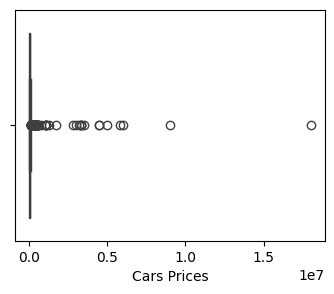

In [129]:
plt.figure(figsize=(4,3))
sns.boxplot(x='Cars Prices',data=df)
plt.show

WE CAN REMOVE OUTLIERS BY USING...iqr(Inter Quartile Range)

<function matplotlib.pyplot.show(close=None, block=None)>

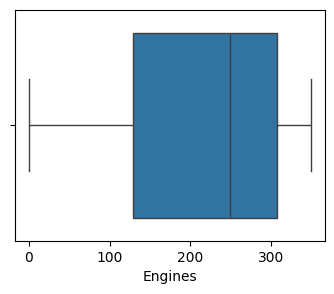

In [130]:
plt.figure(figsize=(4,3))
sns.boxplot(x='Engines',data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

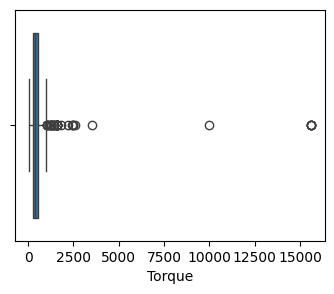

In [131]:
plt.figure(figsize=(4,3))
sns.boxplot(x='Torque',data=df)
plt.show

In [134]:
q1=np.quantile(df['Torque'],0.25)
q3=np.quantile(df['Torque'],0.75)

In [135]:
iqr=q3-q1

In [136]:
min_r=q1-(1.5*iqr)
max_r=q3+(1.5*iqr)

Above is the way to remove outliers....but not removing yet

Now for data scaling...we need to first divide data into input and output and that depends on the ML algo we will be using

3 categories...supervises, undupervised and reinforcement learning
do separate in input/output for supervised and conduct scaling on input only
no separtion for unsupervised

Scaling means to bring all the data within the same range otherwise the algorithm will give more importance to the feature with higher values

SCALING

In [138]:
StandardScaler().fit_transform(df)

array([[-1.2118888 ,  0.83203944,  1.25984121, ...,  2.39264733,
        -2.58654467,  0.27720431],
       [ 0.81490519,  0.40422827,  1.17997858, ...,  0.47647076,
         0.27396832,  0.37212166],
       [-1.1105491 ,  0.02880215, -1.94464675, ...,  0.47647076,
         0.27396832, -0.36823367],
       ...,
       [ 1.32160368, -0.74824261, -1.00626087, ..., -1.4397058 ,
         0.27396832, -0.29229979],
       [ 1.32160368, -1.03636034, -1.14602047, ..., -1.20018373,
         0.27396832, -0.29467272],
       [ 1.32160368,  0.70107684, -0.48715378, ..., -0.48161752,
         0.27396832, -0.18741612]])

In [140]:
new_data=pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)

In [141]:
new_data

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Cars Prices,Fuel Types,Seats,Torque
0,-1.211889,0.832039,1.259841,0.807090,3.057663,2.336936,1.348943,2.392647,-2.586545,0.277204
1,0.814905,0.404228,1.179979,1.489647,1.190629,0.629083,0.451042,0.476471,0.273968,0.372122
2,-1.110549,0.028802,-1.944647,-1.561785,-1.075483,-0.983890,-0.175385,0.476471,0.273968,-0.368234
3,0.105527,-1.734828,1.259841,0.793706,1.503358,0.629083,0.031553,0.476471,-0.043866,0.372122
4,-1.921267,-1.330299,1.169996,1.088143,1.372665,1.957413,0.161033,0.476471,-2.586545,0.049403
...,...,...,...,...,...,...,...,...,...,...
1205,1.321604,-0.724960,-0.477171,-0.169904,-0.317000,-0.699248,-0.130076,-0.960662,0.273968,-0.255282
1206,1.321604,-1.539839,-0.527085,-0.263588,0.084412,-0.699248,-0.124177,-1.200184,0.909638,0.115845
1207,1.321604,-0.748243,-1.006261,-0.624942,-0.585386,-0.509486,-0.156203,-1.439706,0.273968,-0.292300
1208,1.321604,-1.036360,-1.146020,-0.785543,-0.648399,-0.699248,-0.148027,-1.200184,0.273968,-0.294673
